# 1. Portfolio Composition

## Portfolio Return

$R_p = R_{a_1}w_{a_1} + R_{a_2}w_{a_2} + ... + R_{a_2}w_{a_2}$

- $R_p$: Portfolio Return
- $R_{a_n}$: Return for asset n
- $w_{a_n}$: Weight for asset n

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

StockReturns = pd.read_csv('datasets/Big9Returns2017.csv', parse_dates=['Date'], index_col=0)
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [2]:
portfolio_weights = np.array([0.12, # Apple
                              0.15, # Microsoft
                              0.08, # Exxon Mobil
                              0.05, # Johnson & Johnson
                              0.09, # JP Morgan
                              0.10, # Amazon
                              0.11, # General Electric
                              0.14, # Facebook
                              0.16]) # AT&T
# Calculate the weighted stock returns
WeightedReturns = StockReturns.iloc[:,:9].mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio
Date,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372


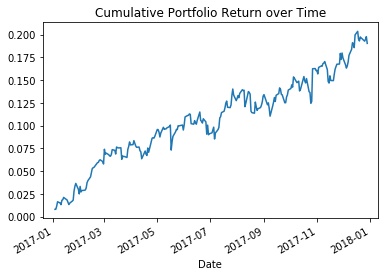

In [13]:
# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1 + StockReturns['Portfolio']).cumprod() - 1)
ax = CumulativeReturns.plot()
ax.set_title('Cumulative Portfolio Return over Time')
ax.set_xlim(('2016-12-20','2018-01-10'))
plt.show()

## Equal weighted portfolios

When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portofolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example

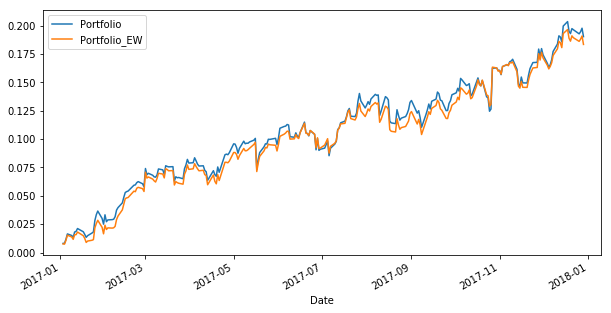

In [14]:
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, :9].mul(portfolio_weights_ew, axis=1).sum(axis=1)

def cumulative_returns_plot(*args):
    cumulative_returns = [ (1 + x).cumprod()-1 for x in args ]
    f, ax = plt.subplots(figsize=(10,5))
    for r in cumulative_returns:
        ax = r.plot(ax=ax)
    ax.set_xlim(('2016-12-20','2018-01-10'))
    ax.legend()
    
cumulative_returns_plot(StockReturns['Portfolio'], StockReturns['Portfolio_EW'])

## Market-cap weighted portfolios

Conversely, when large companies are doing well, **market capitalization**, or "market cap" weighted portfolios tend to outperform. This is because the largest weights are being assigned to the largest companies, or the companies with the largest market cap.

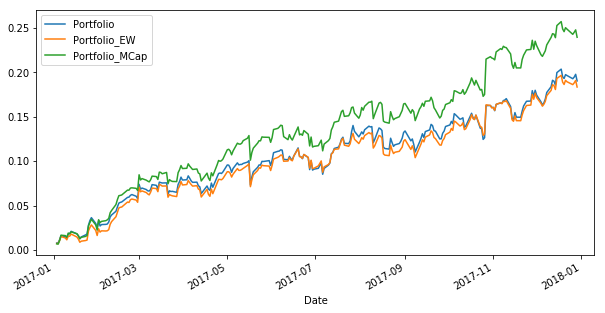

In [15]:
market_capitalizations = np.array([601.51, # Apple
                                    469.25, # Microsoft
                                    349.5, # Exxon Mobil
                                    310.48, # Johnson & Johnson
                                    299.77, # JP Morgan
                                    356.94, # Amazon
                                    268.88, # General Electric
                                    331.57, # Facebook
                                    246.09]) # AT&T

# Calculate the market cap weights
mcap_weights = market_capitalizations/sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
cumulative_returns_plot(StockReturns['Portfolio'], 
                        StockReturns['Portfolio_EW'], 
                        StockReturns['Portfolio_MCap'])

# 2. Correlation and Co-Variance

## Correlation matrix

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets.

In [18]:
correlation_matrix = StockReturns.iloc[:,:9].corr()
correlation_matrix

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,1.000000,0.437430,0.055505,0.038432,0.199914,0.509472,0.006766,0.542367,0.005082
MSFT,0.437430,1.000000,0.084108,0.230215,0.191248,0.621096,-0.044827,0.543341,-0.021079
XOM,0.055505,0.084108,1.000000,0.121012,0.305926,0.015118,0.193861,-0.046813,0.197576
JNJ,0.038432,0.230215,0.121012,1.000000,0.070328,0.052781,0.067930,0.079391,0.091622
JPM,0.199914,0.191248,0.305926,0.070328,1.000000,0.013919,0.257401,0.095245,0.252832
AMZN,0.509472,0.621096,0.015118,0.052781,0.013919,1.000000,-0.092188,0.653030,-0.017909
GE,0.006766,-0.044827,0.193861,0.067930,0.257401,-0.092188,1.000000,-0.024364,0.292706
FB,0.542367,0.543341,-0.046813,0.079391,0.095245,0.653030,-0.024364,1.000000,-0.024505
T,0.005082,-0.021079,0.197576,0.091622,0.252832,-0.017909,0.292706,-0.024505,1.000000


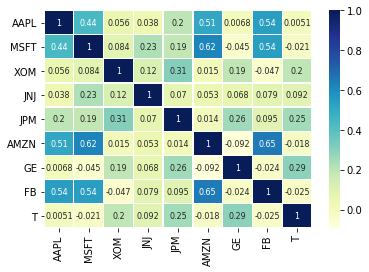

In [30]:
import seaborn as sns

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.3,
           annot_kws={'size': 8})
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Co-variance matrix

The correlation matrix doesn't really tell you anything about the variance of the underlying assets, only the linear relationships between assets. The co-variance (a.k.a. variance-covariance) matrix, on the other hand, contains all of this information, and is very useful for portfolio optimization and risk management purposes.


$$\Sigma ={\begin{bmatrix}\mathrm {E} [(X_{1}-\mu _{1})(X_{1}-\mu _{1})]&\mathrm {E} [(X_{1}-\mu _{1})(X_{2}-\mu _{2})]&\cdots &\mathrm {E} [(X_{1}-\mu _{1})(X_{n}-\mu _{n})]\\\\\mathrm {E} [(X_{2}-\mu _{2})(X_{1}-\mu _{1})]&\mathrm {E} [(X_{2}-\mu _{2})(X_{2}-\mu _{2})]&\cdots &\mathrm {E} [(X_{2}-\mu _{2})(X_{n}-\mu _{n})]\\\\\vdots &\vdots &\ddots &\vdots \\\\\mathrm {E} [(X_{n}-\mu _{n})(X_{1}-\mu _{1})]&\mathrm {E} [(X_{n}-\mu _{n})(X_{2}-\mu _{2})]&\cdots &\mathrm {E} [(X_{n}-\mu _{n})(X_{n}-\mu _{n})]\end{bmatrix}}.$$

**Annualizing** the co-variance matrix by multiplying it with **252**.

In [22]:
# Calculate the covariance matrix
cov_mat = StockReturns.iloc[:,:9].cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat * 252

cov_mat_annual

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
AAPL,0.030996,0.011400,0.001093,0.000774,0.005716,0.018805,0.000236,0.016243,0.000152
MSFT,0.011400,0.021912,0.001392,0.003899,0.004597,0.019275,-0.001315,0.013682,-0.000530
XOM,0.001093,0.001392,0.012500,0.001548,0.005554,0.000354,0.004295,-0.000890,0.003751
JNJ,0.000774,0.003899,0.001548,0.013092,0.001307,0.001266,0.001540,0.001545,0.001780
JPM,0.005716,0.004597,0.005554,0.001307,0.026371,0.000474,0.008283,0.002631,0.006972
AMZN,0.018805,0.019275,0.000354,0.001266,0.000474,0.043954,-0.003830,0.023290,-0.000638
GE,0.000236,-0.001315,0.004295,0.001540,0.008283,-0.003830,0.039270,-0.000821,0.009849
FB,0.016243,0.013682,-0.000890,0.001545,0.002631,0.023290,-0.000821,0.028937,-0.000708
T,0.000152,-0.000530,0.003751,0.001780,0.006972,-0.000638,0.009849,-0.000708,0.028833


## Portfolio Standard Deviation

Portfolio standard deviation for a two asset portfolio:
$$\sigma_p = \sqrt{w^2_1\sigma^2_1 + w^2_2\sigma^2_2 + 2w_1w_2p_{1,2}\sigma_1\sigma_2}$$

- $\sigma_p$: Portfolio standard deviantion
- w: Asset weight
- $\sigma$: Asset volatitliy
- $p_{1,2}$: Correlation between assets 1 and 2

The formula for portfolio volatility is:

$$\sigma_{Portflio} = \sqrt{w^T \cdot \Sigma \cdot w}$$
- $\sigma_{Portflio}$: Portfolio volatility
- $\Sigma$: Covariance matrix of returns
- w: Portfolio weights (wT is transposed portfolio weights)
- $\cdot$ The dot-multiplication operator

In [28]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713807


# 3. Markowitz Portfolios

## Sharpe Ratios

The Sharpe ratio is a measure of **risk-adjusted return**.

The Sharpe ratio is a simple metric of risk adjusted return which was pioneered by William F. Sharpe. Sharpe ratio is useful to determine how much risk is being taken to achieve a certain level of return. In finance, you are always seeking ways to improve your Sharpe ratio, and the measure is very commonly quoted and used to compare investment strategies.

The original 1966 Sharpe ratio calculation is quite simple:

$$ S = \frac{R_a - r_f}{\sigma_a}$$

- S: Sharpe Ratio
- $R_a$: Asset return
- $r_f$: Risk-free rate of return
- $\sigma_a$: Asset volatility

## The Markowitz Portfolios

Any point on the efficient frontier is an optimium portfolio.
These two common points are called Markowitz Portfolios:
- **MSR**: Max Sharpe Ratio portfolio
- **GMV**: Global Minimum Volatility portfolio

![Markowitz Portfolios](img/efficient-frontier.png)

- You can select the tangency portfolio, which is the portfolio with the highest Sharpe ratio, and crosses the **capital allocation line** according to the **CAPM** theory.
- Where the capital allocation line hits 0 on the x-axis, that would be the risk free rate.
- Any portfolio below the efficient frontier is technically sub-par when compared to other possible portfolios

### Choosing a portfolio
- Try to pick a portfolio on the bounding edge of the efficient frontier
- Higher return is available if you can take higher risk (choosing where on the efficient frontier is a personal preference)

### Past Performance is not a guarantee of future Returns

Even though a Max Sharpe Ratio portfolio might sound nice, in practice, returns are
extremely difficult to predict.

In [32]:
# Load random constructions of the portfolio
RandomPortfolios = pd.read_csv('datasets/EfficientFrontierPortfoliosSlim.csv')
RandomPortfolios

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473
5,0.030217,0.004305,0.107714,0.029107,0.029903,0.188373,0.269350,0.332927,0.008105,0.142316,0.175777
6,0.007655,0.169038,0.023114,0.032340,0.004398,0.085970,0.263038,0.360287,0.054160,0.142178,0.175248
7,0.169201,0.209762,0.012899,0.021552,0.005978,0.319981,0.227702,0.025310,0.007615,0.143907,0.176766
8,0.268996,0.053900,0.002833,0.025432,0.008408,0.322627,0.148876,0.139105,0.029822,0.149417,0.182563
9,0.021353,0.069281,0.014999,0.036764,0.059347,0.134356,0.309673,0.332525,0.021702,0.142921,0.174062


In [33]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns'] - risk_free) / RandomPortfolios['Volatility']

# Print the range of Sharpe ratios
print(RandomPortfolios['Sharpe'].describe()[['min', 'max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64


## The MSR Portfolio

The **maximum Sharpe ratio**, or MSR portfolio, which lies at the apex of the efficient frontier, can be constructed by looking for the portfolio with the highest Sharpe ratio.

Unfortunately, the MSR portfolio is often quite erratic. Even though the portfolio had a high historical Sharpe ratio, it doesn't guarantee that the portfolio will have a good Sharpe ratio moving forward.

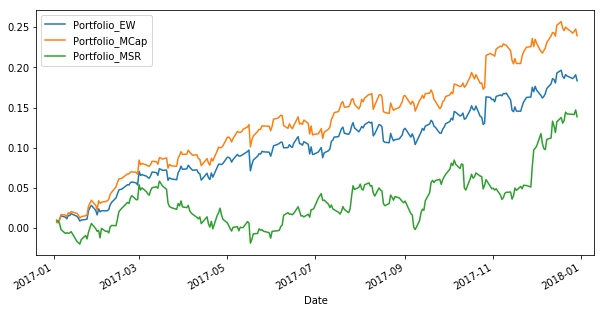

In [42]:
# Extract the portfolio with max Sharpe ratio
MSR_weights = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False).iloc[0,:9].values

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, :9].mul(MSR_weights, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns['Portfolio_EW'], 
                        StockReturns['Portfolio_MCap'], 
                        StockReturns['Portfolio_MSR'])

## The GMV portfolio
The **global minimum volatility portfolio**, or GMV portfolio, is the portfolio with the **lowest standard deviation (risk) and the highest return for the given risk level**.

Returns are very hard to predict, but volatilities and correlations tend to be more stable over time. This means that the GMV portfolio often outperforms the MSR portfolios out of sample even though the MSR would outperform quite significantly in-sample. Of course, out of sample results are what really matters in finance.

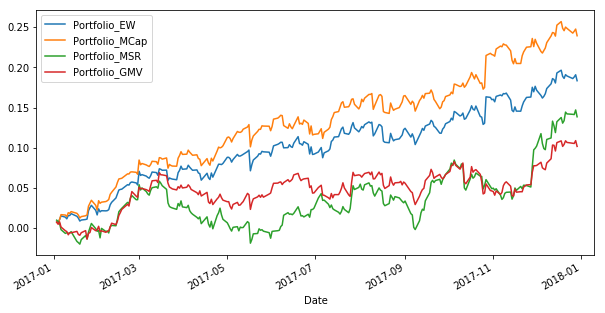

In [43]:
# Extract the portfolio with max Sharpe ratio
GMV_weights = RandomPortfolios.sort_values(by=['Volatility'], ascending=True).iloc[0,:9].values

# Calculate the MSR portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, :9].mul(GMV_weights, axis=1).sum(axis=1)

# Plot the cumulative returns
cumulative_returns_plot(StockReturns['Portfolio_EW'], 
                        StockReturns['Portfolio_MCap'], 
                        StockReturns['Portfolio_MSR'],
                        StockReturns['Portfolio_GMV'])